Goals of project : Predict the variable TD9636_STAGE

Ideas : 
- Regarder la saisonalité des tempêtes par bassin ou subbassin (car peut y aavoir des changements d'un hémisphère à l'autre par exemple).
-  Regarder évolution winspeed par tempête (pendant sa durée de vie)

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
pd.options.display.max_info_columns = 200

# Fonctions utilisées

In [3]:
def distribution(var,df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=var)
    plt.title(f"Distribution de la variable {var}")
    plt.xlabel("Modalités")
    plt.ylabel("Nombre d'individus par modalité")
    plt.show()

# Chargement des données et premières visualisations

In [4]:
df= pd.read_csv("ibtracs.csv")

C:\Users\PAU.HIRSINGER\AppData\Local\Temp\ipykernel_18308\2395836842.py:1: DtypeWarning: Columns (1,2,8,9,14,19,20,172,173) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("ibtracs.csv")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297099 entries, 0 to 297098
Data columns (total 174 columns):
 #    Column            Non-Null Count   Dtype 
---   ------            --------------   ----- 
 0    SID               297099 non-null  object
 1    SEASON            297099 non-null  object
 2    NUMBER            297099 non-null  object
 3    BASIN             256581 non-null  object
 4    SUBBASIN          264453 non-null  object
 5    NAME              297099 non-null  object
 6    ISO_TIME          297099 non-null  object
 7    NATURE            297099 non-null  object
 8    LAT               297099 non-null  object
 9    LON               297099 non-null  object
 10   WMO_WIND          297099 non-null  object
 11   WMO_PRES          297099 non-null  object
 12   WMO_AGENCY        297099 non-null  object
 13   TRACK_TYPE        297099 non-null  object
 14   DIST2LAND         297099 non-null  object
 15   LANDFALL          297099 non-null  object
 16   IFLAG             

In [6]:
df[["NAME","STORM_SPEED","STORM_DIR","SID","REUNION_LAT","REUNION_PRES"]].sample(20)

,NAME,STORM_SPEED,STORM_DIR,SID,REUNION_LAT,REUNION_PRES
44926,JAVIER,5,310,1986233N10263,,
78735,UNNAMED,7,285,1991233N22147,,
20070,MARK,6,165,1983019S14176,,
101837,JOHN,5,325,1994222N11267,,
284254,HOWARD,9,295,2022219N14255,,
156616,UNNAMED,11,135,2002073S16161,,
104355,NONA,2,270,1994294N13203,,
41537,JUNE,9,130,1986036S19216,,
283706,AERE,11,5,2022180N15130,,
121840,UNNAMED,0,270,1997008S16093,,


In [7]:
sids = df["SID"].unique()
print(f"The dataset contains infos on {len(sids)} different storms")

The dataset contains infos on 4768 different storms


In [8]:
df.loc[df["SID"] == "1990216N13281"]

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
71260,1990216N13281,1990,57,NaN,CS,DIANA,1990-08-04 00:00:00,TS,13.2,-79.5,...,,,,,,,,,15,295
71261,1990216N13281,1990,57,NaN,CS,DIANA,1990-08-04 03:00:00,TS,13.5,-80.2,...,,,,,,,,,14,300
71262,1990216N13281,1990,57,NaN,CS,DIANA,1990-08-04 06:00:00,TS,13.9,-80.8,...,,,,,,,,,14,305
71263,1990216N13281,1990,57,NaN,CS,DIANA,1990-08-04 09:00:00,TS,14.3,-81.3,...,,,,,,,,,13,315
71264,1990216N13281,1990,57,NaN,CS,DIANA,1990-08-04 12:00:00,TS,14.8,-81.8,...,,,,,,,,,12,320
71265,1990216N13281,1990,57,NaN,CS,DIANA,1990-08-04 15:00:00,TS,15.2,-82.2,...,,,,,,,,,12,320
71266,1990216N13281,1990,57,NaN,CS,DIANA,1990-08-04 18:00:00,TS,15.7,-82.6,...,,,,,,,,,12,315
71267,1990216N13281,1990,57,NaN,CS,DIANA,1990-08-04 21:00:00,TS,16.2,-83.1,...,,,,,,,,,13,315
71268,1990216N13281,1990,57,NaN,CS,DIANA,1990-08-05 00:00:00,TS,16.6,-83.6,...,,,,,,,,,13,310
71269,1990216N13281,1990,57,NaN,CS,DIANA,1990-08-05 03:00:00,TS,17.0,-84.2,...,,,,,,,,,14,305


In [9]:
df["SUBBASIN"].unique()

array([' ', 'MM', 'EA', 'WA', 'CP', nan, 'GM', 'CS', 'BB', 'AS'],
      dtype=object)

In [10]:
df[["SID","NUMBER","SEASON"]].iloc[50000:50020]

,SID,NUMBER,SEASON
50000,1987200N04191,42,1987
50001,1987200N04191,42,1987
50002,1987200N04191,42,1987
50003,1987200N04191,42,1987
50004,1987200N04191,42,1987
50005,1987200N04191,42,1987
50006,1987200N04191,42,1987
50007,1987200N04191,42,1987
50008,1987200N04191,42,1987
50009,1987200N04191,42,1987


In [11]:
df["SEASON"].unique()

array(['Year', '1980', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024, 2025], dtype=object)

In [12]:
list = df["NAME"].unique()
len(list)

1536

# Analyses des variables

### Variable cible

In [13]:
df["TD9636_STAGE"].unique()
# Des valeurs de 0 à 6 avec des valeurs nulles

array([' ', '1', '2', '4', '0', '6', '5', '3'], dtype=object)

In [14]:
df["TD9636_STAGE"].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
297094    False
297095    False
297096    False
297097    False
297098    False
Name: TD9636_STAGE, Length: 297099, dtype: bool

TD9636_STAGE
     248756
2     17204
1     16028
4     10623
0      3156
3       742
5       331
6       259
Name: count, dtype: int64


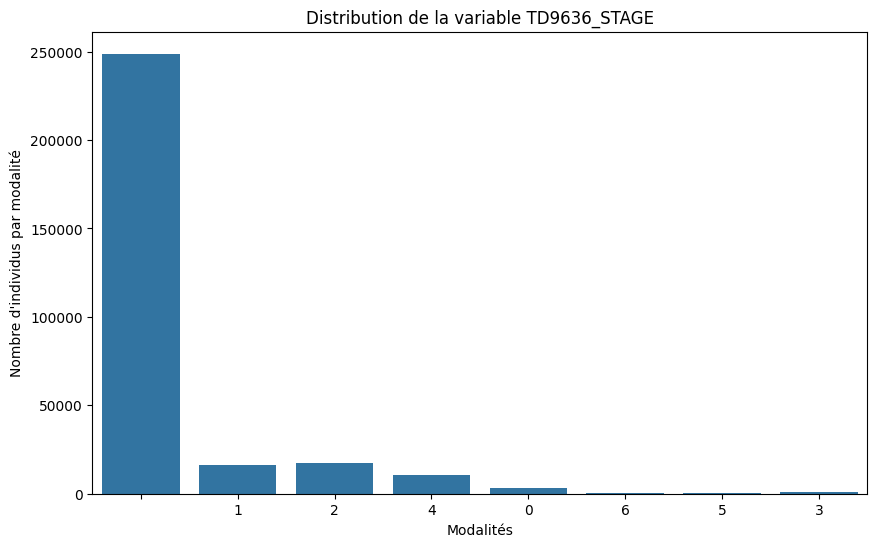

In [15]:
print(df['TD9636_STAGE'].value_counts())
distribution('TD9636_STAGE', df)

Nous allons regarder quelles sont ces fameuses valeurs vides et comprendre si il y une raison.

In [16]:
df.loc[df["TD9636_STAGE"] == " "].sample(10)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
296725,2024271N20126,2024,66,WP,MM,KRATHON,2024-09-29 03:00:00,NR,18.9,124.1,...,,,,,,,,,6,325
244015,2016188N12254,2016,27,EP,MM,CELIA,2016-07-14 21:00:00,TS,21.4,-137.9,...,,,,12,180,90,90,120,12,295
102665,1994244N07151,1994,72,WP,MM,KINNA,1994-09-02 00:00:00,NR,10.0,147.5,...,,,,,,,,,10,295
168050,2003340S07093,2004,99,SI,MM,JANA,2003-12-14 00:00:00,TS,-14.4,84.2,...,,,,,,,,,14,290
82179,1991360S13058,1992,99,SI,MM,BRYNA,1992-01-04 00:00:00,TS,-15.5,45.2,...,,,,,,,,,7,235
1402,1980073S09133,1980,23,SI,WA,DORIS:GLORIA,1980-03-23 12:00:00,TS,-16.8,108.0,...,,,,,,,,,12,265
241665,2015321N04164,2015,102,WP,MM,IN-FA,2015-11-20 18:00:00,TS,11.0,144.4,...,,,,,,,,,16,275
9428,1981212N17142,1981,53,WP,MM,PHYLLIS,1981-08-03 12:00:00,TS,29.0,146.5,...,,,,,,,,,13,355
198573,2008286N16323,2008,77,NaN,NaN,NANA,2008-10-15 12:00:00,DS,22.0,-48.0,...,,,,,,,,,18,330
282462,2022076S10126,2022,18,SI,WA,CHARLOTTE,2022-03-17 21:00:00,DS,-9.9,122.6,...,,,,,,,,,12,255


On regarde si il y a un lien entre les valeurs manquantes de la variable cible et la variable nature.
Nous allons regarder cela sur plusieurs axes : le type de tempête, les zones géographiques et les dates.

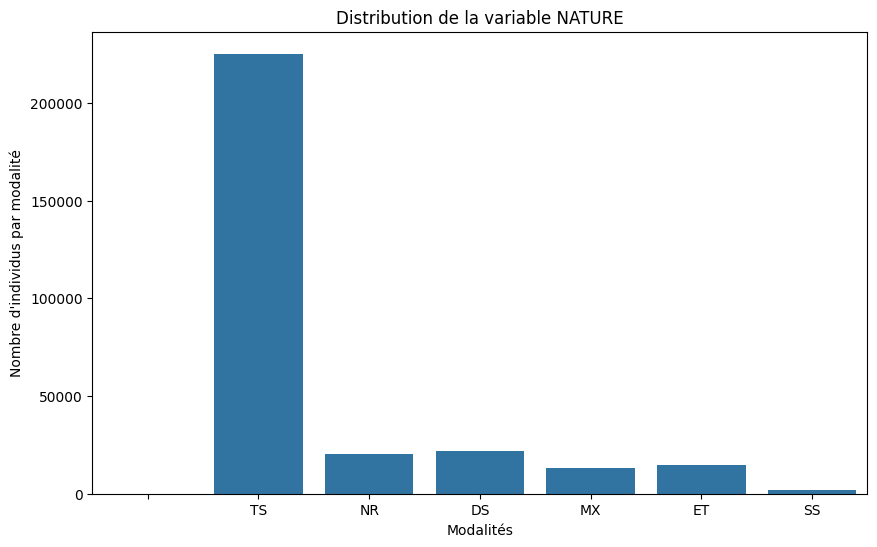

In [17]:
distribution('NATURE',df)

In [18]:
df_filtered = df.loc[df["TD9636_STAGE"] != " "]

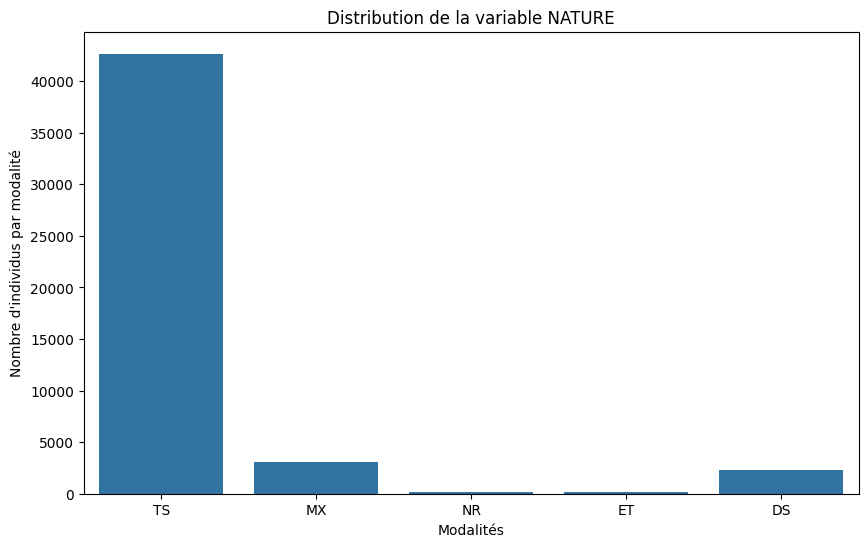

In [19]:
distribution("NATURE", df_filtered)

Pas vraiument de lien

In [20]:
df["BASIN"]

0           
1         SP
2         SP
3         SP
4         SP
          ..
297094    WP
297095    WP
297096    WP
297097    WP
297098    WP
Name: BASIN, Length: 297099, dtype: object

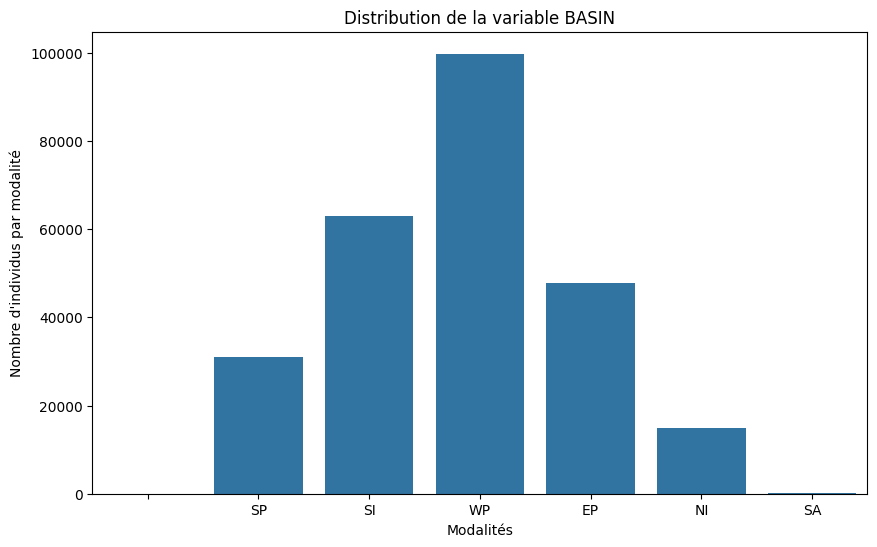

In [21]:
distribution("BASIN", df)

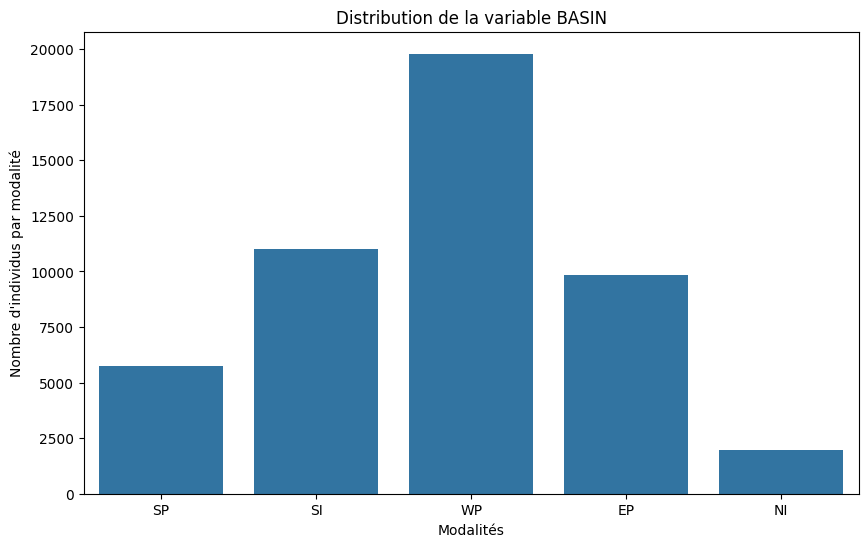

In [22]:
distribution("BASIN", df_filtered)

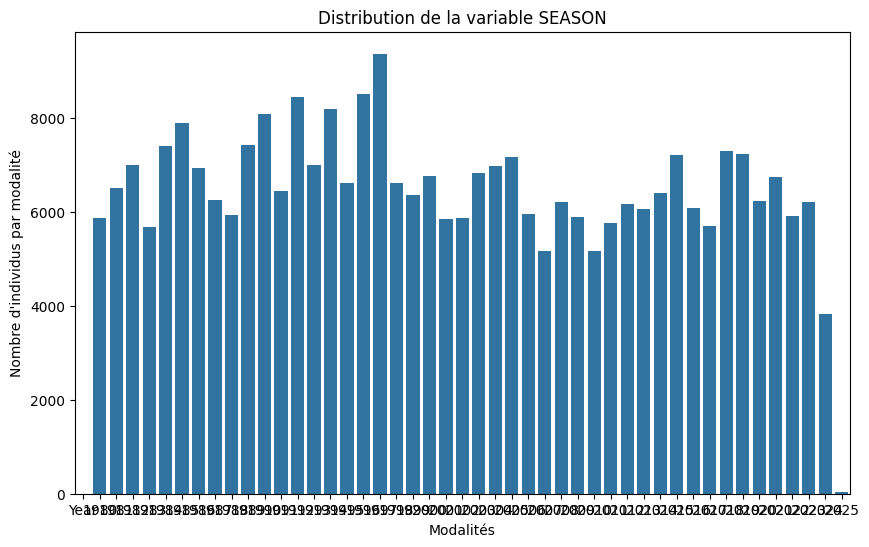

In [23]:
distribution("SEASON", df)

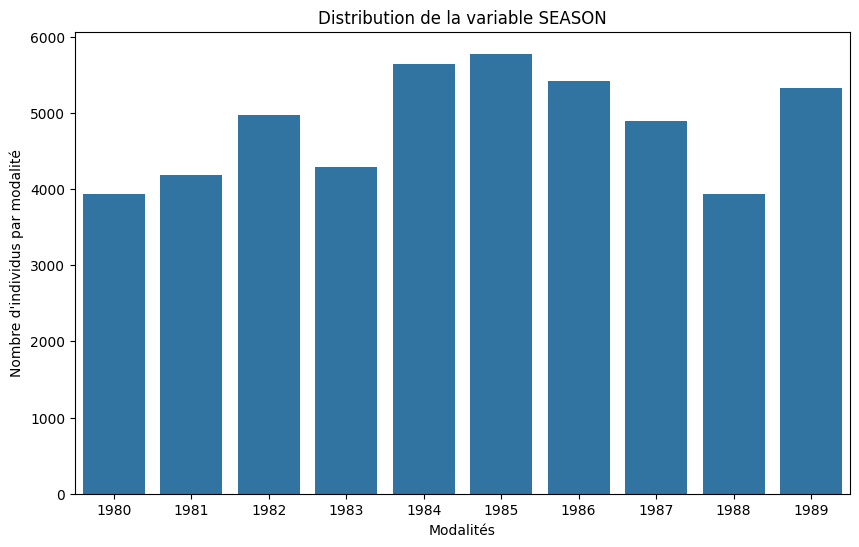

In [24]:
distribution("SEASON", df_filtered)

Donc ici nous remarquons que cette mesure a uniquement été effectuée entre 1980 et 1989. Donc Pour étudier la variable cible, nous étudierons uniquement des observations entre 1980 et 1989.

### Analyse de la variable WMO_AGENCY

Cette variable fait référence aux agences responsables de la surveillance des différent bassins

In [25]:
df["WMO_AGENCY"].unique()

array([' ', 'wellington', 'reunion', 'bom', 'cphc', 'tokyo', 'hurdat_epa',
       'hurdat_atl', 'newdelhi', 'nadi', 'atcf'], dtype=object)

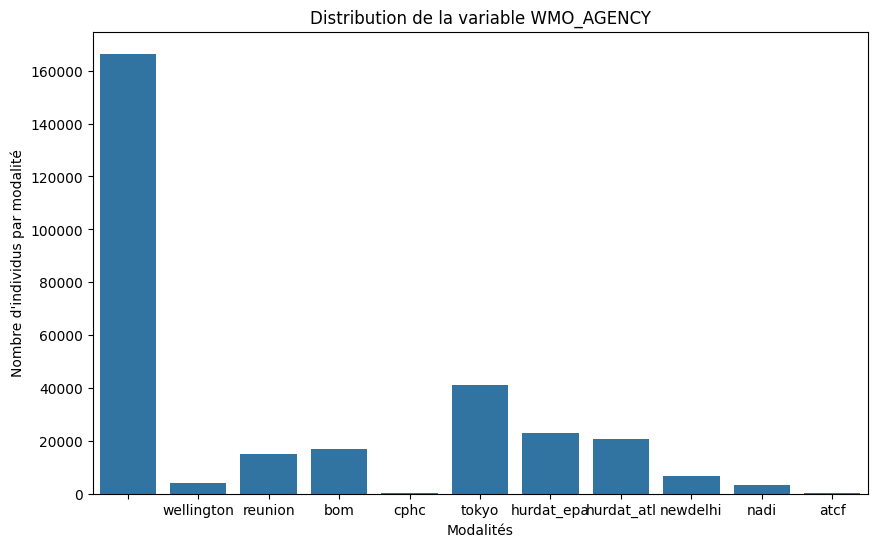

In [26]:
distribution("WMO_AGENCY",df)

On remarque aussi que la majorité ne sont pas renseignées; Regardons s'il y a un lien avec la variable cible concernant les valeurs manquantes.

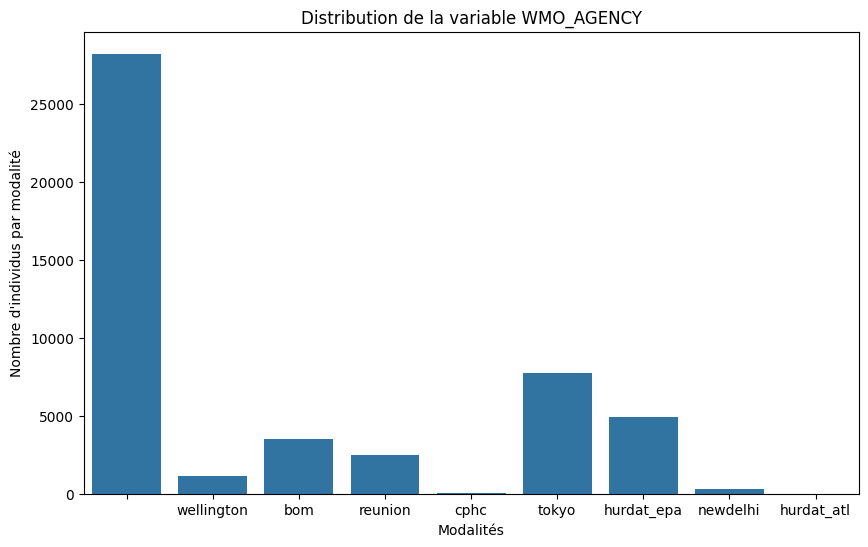

In [27]:
distribution("WMO_AGENCY",df_filtered)

Pas vraiment de lien visiblement

In [28]:
df['SEASON'] = pd.to_numeric(df['SEASON'], errors='coerce')
df_reunion = df[df['WMO_AGENCY'] == 'reunion']
df_reunion_filtered = df_reunion[df_reunion['SEASON'] < 1993]

print("Nombre de lignes avec WMO_AGENCY='reunion' avant 1993 :", len(df_reunion_filtered))
print(df_reunion_filtered['SEASON'].value_counts().sort_index())

df_imd = df[df['WMO_AGENCY'] == 'newdelhi']
df_imd_filtered = df_imd[df_imd['SEASON'] < 1990]

print("\nNombre de lignes avec WMO_AGENCY='newdelhi' avant 1990 :", len(df_imd_filtered))
print(df_imd_filtered['SEASON'].value_counts().sort_index())

Nombre de lignes avec WMO_AGENCY='reunion' avant 1993 : 3803
SEASON
1980.0    274
1981.0    314
1982.0    289
1983.0    126
1984.0    429
1985.0    293
1986.0    297
1987.0    233
1988.0    322
1989.0    357
1990.0    319
1991.0    181
1992.0    369
Name: count, dtype: int64

Nombre de lignes avec WMO_AGENCY='newdelhi' avant 1990 : 578
SEASON
1982.0    139
1983.0     61
1984.0     70
1985.0     95
1986.0     24
1987.0    107
1988.0     40
1989.0     42
Name: count, dtype: int64


Cela confirme bien la doc. On a bien les agences actuelles qui sont mises et pas forcément celles de l'époque (par exemple l'agence de la Réunion n'existait pas avant 1993 donc nous ne devririons pas avoir d'observations avant cette date )

# Analyse de valeurs manquantes

In [29]:
df.replace(to_replace=" ", value=pd.NA, inplace=True)

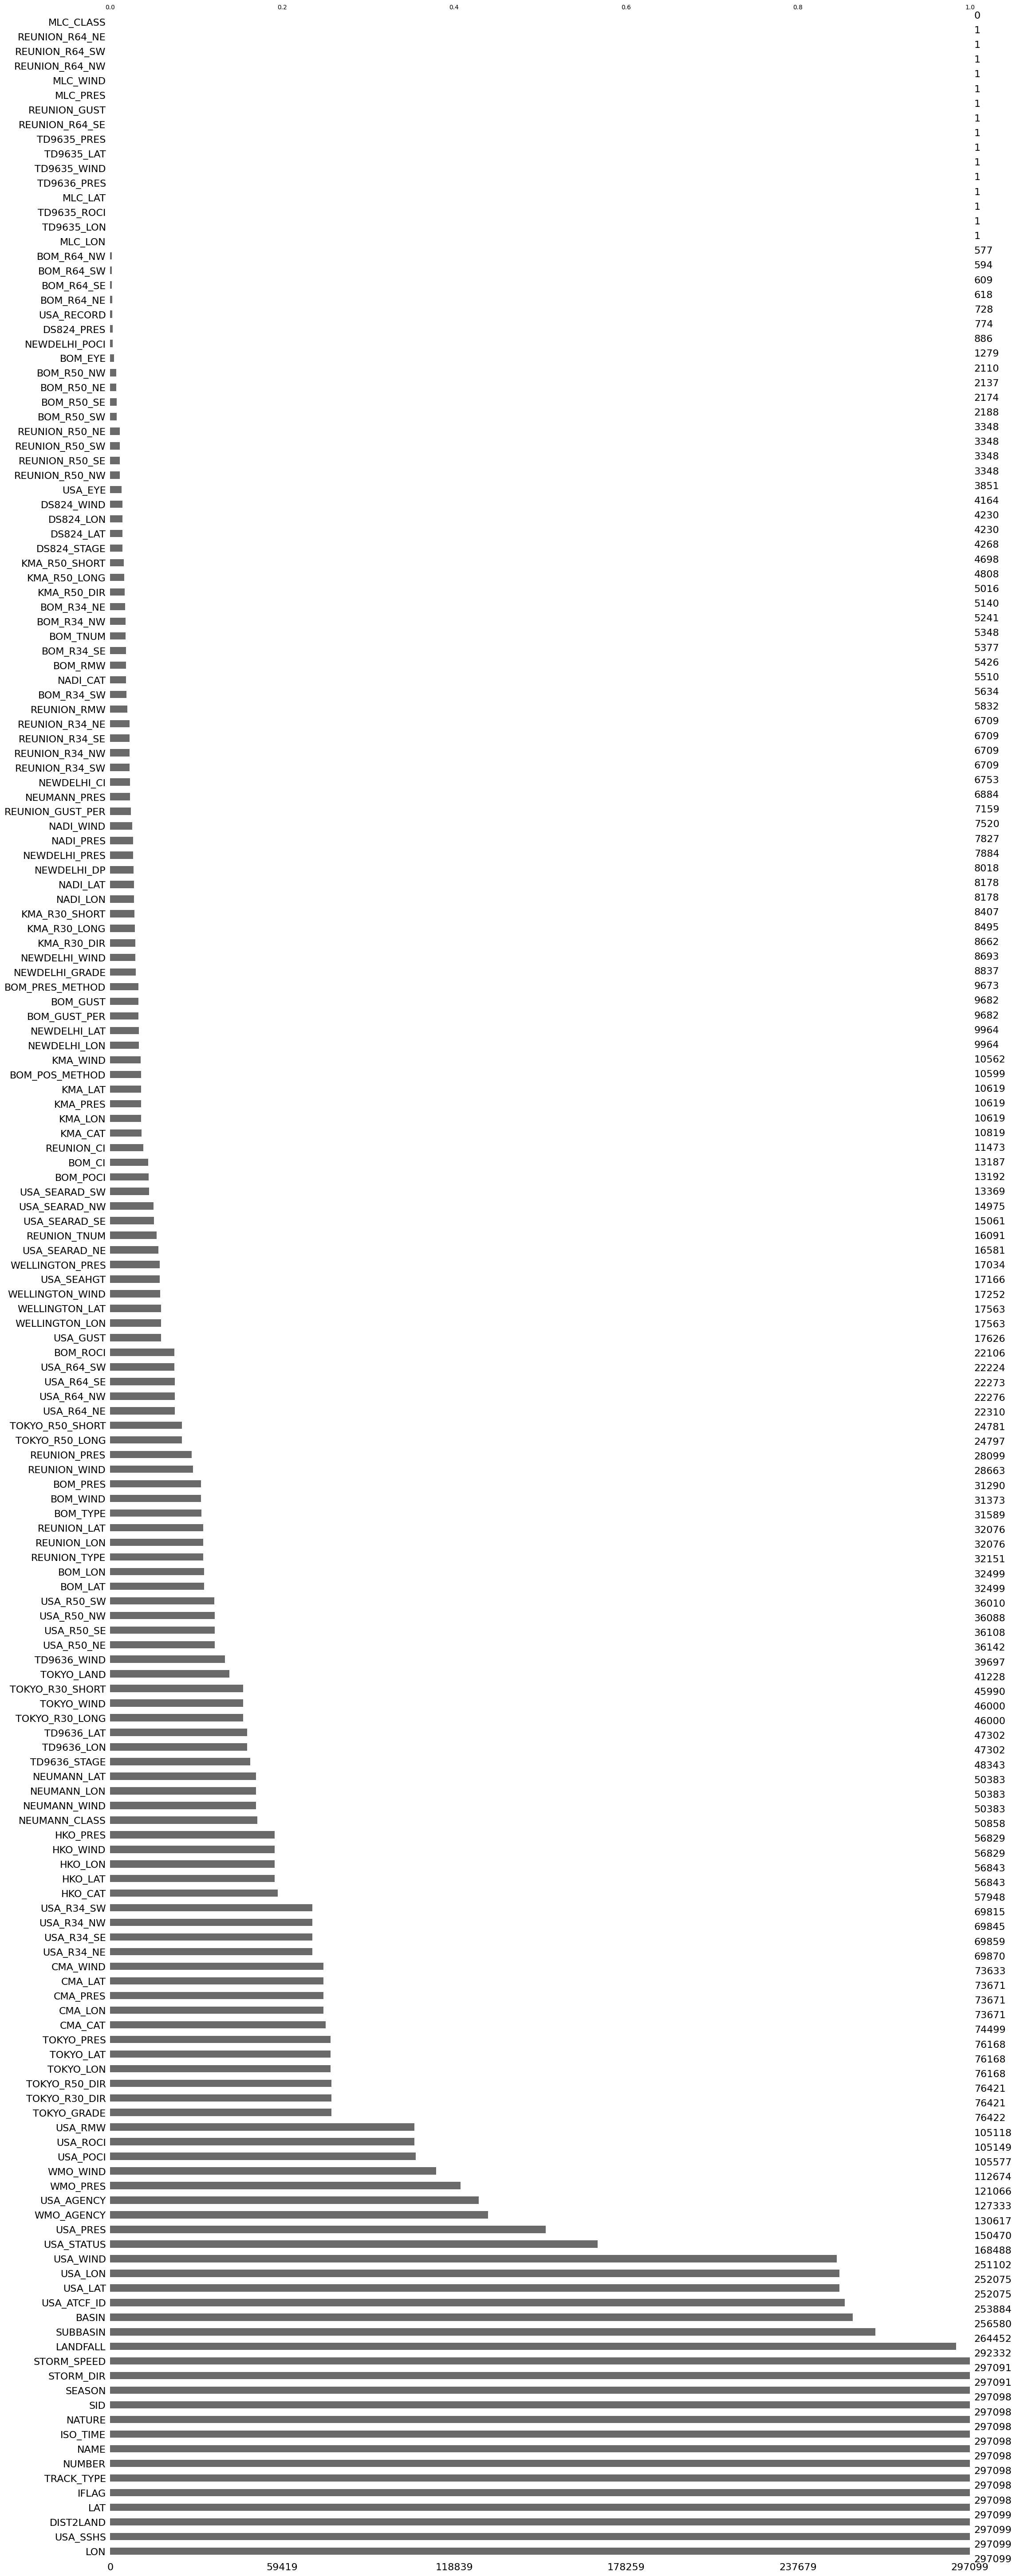

In [30]:
plt.figure(figsize=(10,6))
msno.bar(df, sort="descending")
plt.show()

En fait beaucoup de valeurs manquantes sont en fait écrites de cette manière : " " , ce qui donne un espace vide et l'illusion d'une valeur manquante.

Maintenant nous avons un vrai visuel des valeures manquantes, et nous remarquons que même pour d'autres variables que la cible, nous avons beaucoup de valeurs manquantes. Cela peut paraitre logique, ce jeu de données constitue un regroupement de données venant de différents centres d'observations, qui ne font pas forcément tous les mêmes mesures, ou n'ont pas forcément tous le même niveau d'équipement.

In [31]:
df["MLC_CLASS"].sample(10)

17865     <NA>
101743    <NA>
51895     <NA>
90340     <NA>
13817     <NA>
91286     <NA>
291887    <NA>
262036    <NA>
239173    <NA>
228737    <NA>
Name: MLC_CLASS, dtype: object

# Analyse des variables temporelles

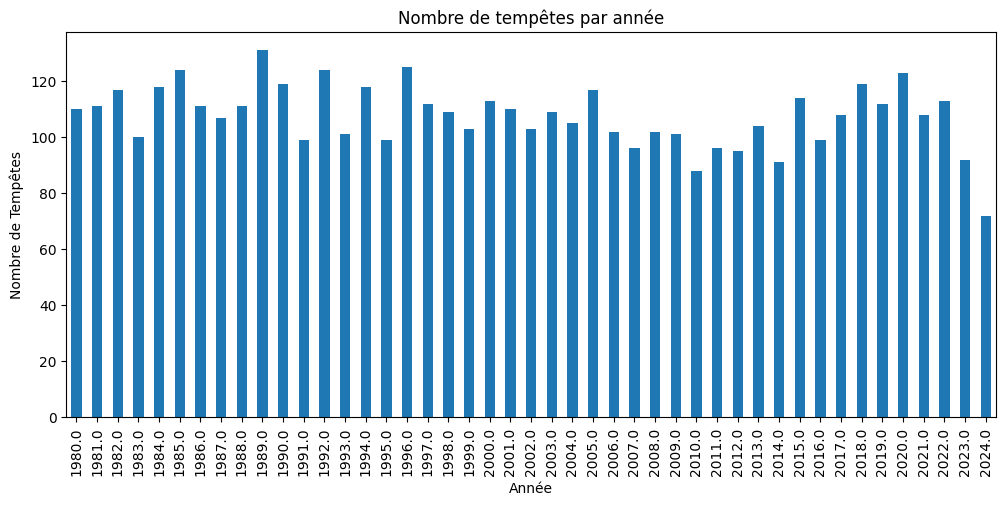

In [32]:
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'], errors='coerce')

df['YEAR'] = df['ISO_TIME'].dt.year
df['MONTH'] = df['ISO_TIME'].dt.month



df.groupby('YEAR')['SID'].nunique().plot(kind='bar', figsize=(12,5))
plt.title("Nombre de tempêtes par année")
plt.xlabel("Année")
plt.ylabel("Nombre de Tempêtes")
plt.show()


### Durée moyenne d'une tempête

Nombre de tempêtes : 4767
Durée moyenne (jours) : 7.567089568328554
Durée médiane (jours) : 7.0
Durée max (jours) : 32.25


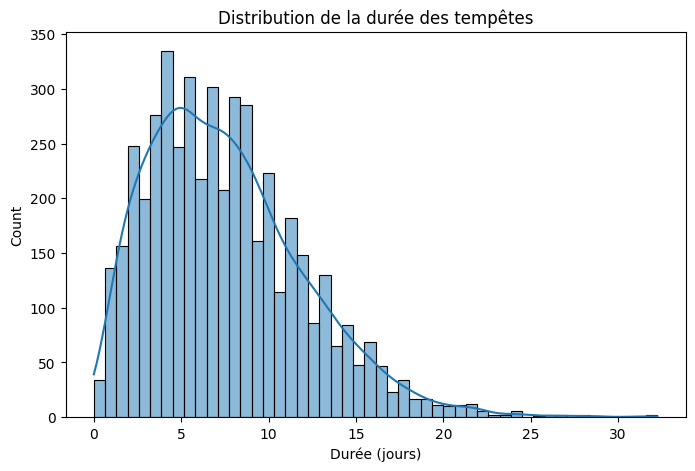

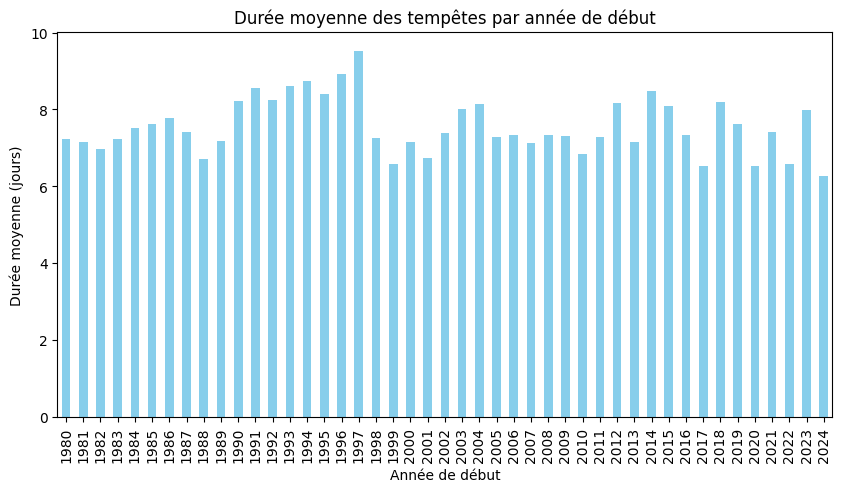

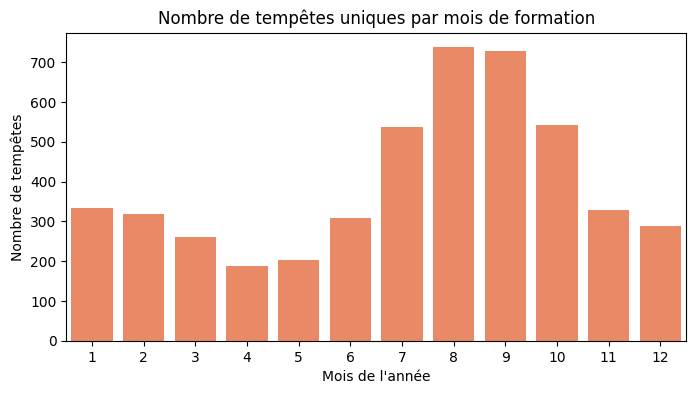

In [33]:
df = df.dropna(subset=['ISO_TIME'])

storm_times = df.groupby('SID')['ISO_TIME'].agg(['min', 'max'])

storm_times['duration_days'] = (storm_times['max'] - storm_times['min']).dt.total_seconds() / (3600 * 24)

# Quelques statistiques globales sur les durées
print("Nombre de tempêtes :", len(storm_times))
print("Durée moyenne (jours) :", storm_times['duration_days'].mean())
print("Durée médiane (jours) :", storm_times['duration_days'].median())
print("Durée max (jours) :", storm_times['duration_days'].max())

plt.figure(figsize=(8,5))
sns.histplot(data=storm_times, x='duration_days', bins=50, kde=True)
plt.xlabel("Durée (jours)")
plt.title("Distribution de la durée des tempêtes")
plt.show()

storm_times['start_year'] = storm_times['min'].dt.year
storm_times['end_year'] = storm_times['max'].dt.year

annual_stats = storm_times.groupby('start_year')['duration_days'].mean()

plt.figure(figsize=(10,5))
annual_stats.plot(kind='bar', color='skyblue')
plt.title("Durée moyenne des tempêtes par année de début")
plt.xlabel("Année de début")
plt.ylabel("Durée moyenne (jours)")
plt.show()

# Saisonnalité: mois de début
df['start_month'] = df.groupby('SID')['ISO_TIME'].transform('min').dt.month
monthly_counts = df.groupby('start_month')['SID'].nunique().sort_index()

plt.figure(figsize=(8,4))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, color='coral')
plt.title("Nombre de tempêtes uniques par mois de formation")
plt.xlabel("Mois de l'année")
plt.ylabel("Nombre de tempêtes")
plt.show()

# Supplément d'idées:
#  - Durée vs intensité max (s'il existe une colonne WMO_WIND, par ex.)
#  - Durée par bassin (BASIN) ou par région
#  - Distribution des durées avant 1980 vs après 2000, etc.


On remarque qu'il y a une saisonnalité pour les tempêtes, avec beaucoup plus de tempêtes de Juillet à Octobre.

# Faire la même analyse pour chaque bassin (ex : comparer hémisphère sud et hémisphère nord)

# Variables géographiques

In [34]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [35]:
df["SID"].unique()

array(['1980001S13173', '1980002S15081', '1980003S15137', ...,
       '2024276S10076', '2024278N21265', '2024280N18146'], dtype=object)

In [36]:
df_unique = df.loc[df["SID"] == "1980001S13173"]
df_unique

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR,YEAR,MONTH,start_month
1,1980001S13173,1980.0,1,SP,MM,PENI,1980-01-01 00:00:00,TS,-12.5,172.5,...,<NA>,<NA>,<NA>,<NA>,<NA>,6,350,1980.0,1.0,1
2,1980001S13173,1980.0,1,SP,MM,PENI,1980-01-01 03:00:00,TS,-12.2,172.4,...,<NA>,<NA>,<NA>,<NA>,<NA>,6,350,1980.0,1.0,1
3,1980001S13173,1980.0,1,SP,MM,PENI,1980-01-01 06:00:00,TS,-11.9,172.4,...,<NA>,<NA>,<NA>,<NA>,<NA>,5,360,1980.0,1.0,1
4,1980001S13173,1980.0,1,SP,MM,PENI,1980-01-01 09:00:00,TS,-11.7,172.4,...,<NA>,<NA>,<NA>,<NA>,<NA>,4,10,1980.0,1.0,1
5,1980001S13173,1980.0,1,SP,MM,PENI,1980-01-01 12:00:00,TS,-11.5,172.5,...,<NA>,<NA>,<NA>,<NA>,<NA>,4,20,1980.0,1.0,1
6,1980001S13173,1980.0,1,SP,MM,PENI,1980-01-01 15:00:00,TS,-11.3,172.6,...,<NA>,<NA>,<NA>,<NA>,<NA>,4,35,1980.0,1.0,1
7,1980001S13173,1980.0,1,SP,MM,PENI,1980-01-01 18:00:00,TS,-11.2,172.7,...,<NA>,<NA>,<NA>,<NA>,<NA>,3,55,1980.0,1.0,1
8,1980001S13173,1980.0,1,SP,MM,PENI,1980-01-01 21:00:00,TS,-11.2,172.9,...,<NA>,<NA>,<NA>,<NA>,<NA>,3,85,1980.0,1.0,1
9,1980001S13173,1980.0,1,SP,MM,PENI,1980-01-02 00:00:00,TS,-11.2,173.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,3,130,1980.0,1.0,1
10,1980001S13173,1980.0,1,SP,MM,PENI,1980-01-02 03:00:00,TS,-11.3,173.1,...,<NA>,<NA>,<NA>,<NA>,<NA>,4,150,1980.0,1.0,1


C:\Users\PAU.HIRSINGER\AppData\Local\Temp\ipykernel_18308\4014313379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['LAT'] = pd.to_numeric(df['LAT'], errors='coerce')
C:\Users\PAU.HIRSINGER\AppData\Local\Temp\ipykernel_18308\4014313379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['LON'] = pd.to_numeric(df['LON'], errors='coerce')


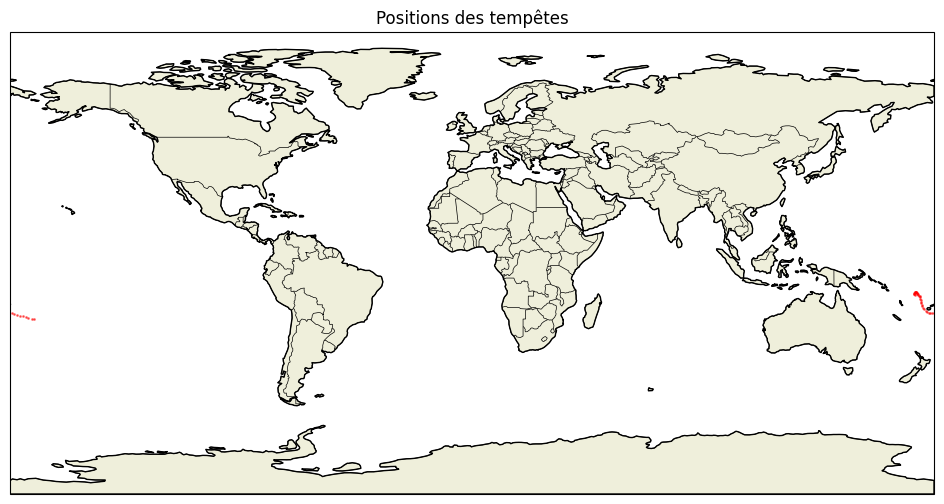

In [47]:
df_unique['LAT'] = pd.to_numeric(df['LAT'], errors='coerce')
df_unique['LON'] = pd.to_numeric(df['LON'], errors='coerce')


plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.set_global()

plt.scatter(df_unique['LON'], df_unique['LAT'], color='red', s=1, transform=ccrs.PlateCarree(), alpha=0.5)

plt.title("Positions des tempêtes")
plt.show()

In [38]:
print(df['LAT'].dtype, df['LON'].dtype)

float64 float64


In [39]:
df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'], errors='coerce')


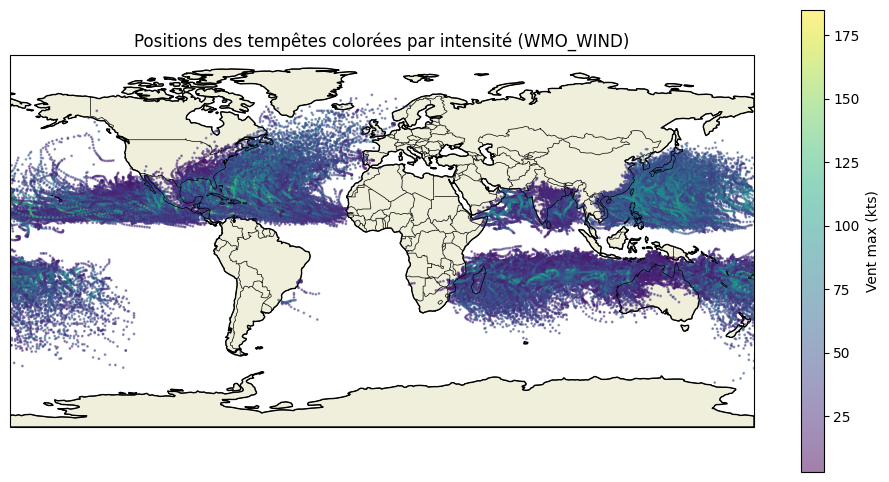

In [40]:
import matplotlib.colors as mcolors

norm = mcolors.Normalize(vmin=df['WMO_WIND'].min(), vmax=df['WMO_WIND'].max(), clip=True)
cmap = plt.cm.viridis  

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.set_global()

scatter = plt.scatter(
    df['LON'], df['LAT'], 
    c=df['WMO_WIND'], cmap=cmap, norm=norm, 
    s=1, transform=ccrs.PlateCarree(), alpha=0.5
)
plt.colorbar(scatter, label="Vent max (kts)")
plt.title("Positions des tempêtes colorées par intensité (WMO_WIND)")
plt.show()


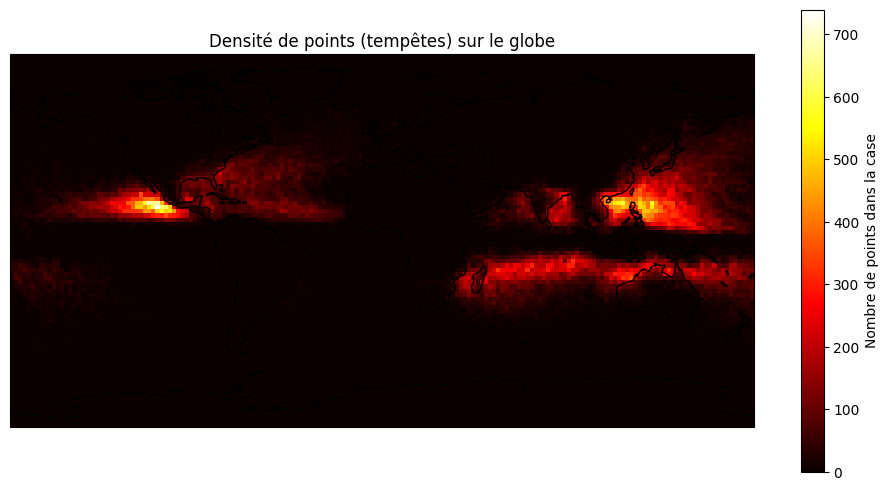

In [41]:
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.set_global()


lon_bins = np.linspace(-180, 180, 180)  
lat_bins = np.linspace(-90, 90, 90)    

plt.hist2d(df['LON'], df['LAT'], bins=[lon_bins, lat_bins], transform=ccrs.PlateCarree(), cmap='hot')
plt.colorbar(label="Nombre de points dans la case")

plt.title("Densité de points (tempêtes) sur le globe")
plt.show()

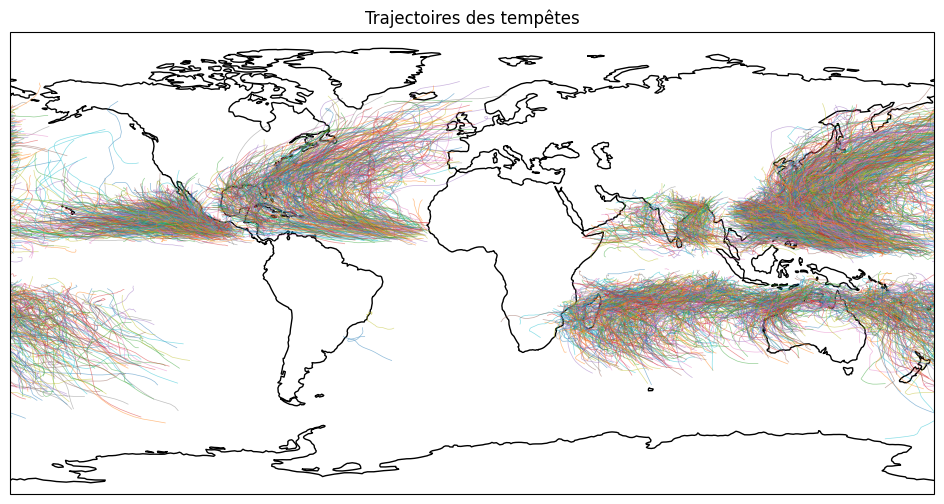

In [42]:
grouped = df.groupby('SID')

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

for sid, group in grouped:
    group = group.sort_values('ISO_TIME')
    plt.plot(group['LON'], group['LAT'], transform=ccrs.PlateCarree(), linewidth=0.5, alpha=0.5)

plt.title("Trajectoires des tempêtes")
plt.show()

In [43]:
df['DIST2LAND'] = pd.to_numeric(df['DIST2LAND'], errors='coerce')
df_dist = df.dropna(subset=['DIST2LAND'])

count_under_100 = (df_dist['DIST2LAND'] < 100).sum()
print(f"Nombre d'observations à < 100 km de la côte : {count_under_100}")


bins = [0, 100, 200, 500, np.inf]
labels = ["<100km", "100-200km", "200-500km", "500km+"]
df_dist['DIST_CAT'] = pd.cut(df_dist['DIST2LAND'], bins=bins, labels=labels)

print("\nRépartition des observations par classe de distance :")
print(df_dist['DIST_CAT'].value_counts())

df_min_dist = df_dist.groupby('SID')['DIST2LAND'].min().reset_index(name='MIN_DIST2LAND')
tempetes_under_100 = (df_min_dist['MIN_DIST2LAND'] < 100).sum()
print(f"\nNombre de tempêtes ayant approché <100 km des côtes : {tempetes_under_100}")


Nombre d'observations à < 100 km de la côte : 45027

Répartition des observations par classe de distance :
DIST_CAT
500km+       167505
200-500km     61306
100-200km     22867
<100km        22256
Name: count, dtype: int64

Nombre de tempêtes ayant approché <100 km des côtes : 2609


In [44]:
df_dist.groupby('BASIN')['DIST2LAND'].mean()

BASIN
EP    982.281001
NI    290.458703
SA    337.243697
SI    894.985333
SP    684.754622
WP    843.008029
Name: DIST2LAND, dtype: float64